# Computer Vision Analysis

In [1]:
#Import Statements
import numpy as np
import pandas as pd
import scipy.stats as stats

import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

import sqlite3
from zipfile import ZipFile

import string
import regex as re

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
color_palette = ["#86BC25"] #Set Color of PLots to Deloitte Green
sns.set_palette(palette=color_palette)

# Import Data 

The two datasets that we utilized are imported below. The numbers is a tabular dataset that contains information regarding budgets and gross for movies while the IMDB database is a relational database that contains information about movie genres and the production personnel behind it. 

In [3]:
the_numbers = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')
the_numbers.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [4]:
#Run only first time to unzip the file

#Confirm with Instructors if we need to have this run
#file_name = "./zippedData/im.db.zip"
# opening the zip file in READ mode
#with ZipFile(file_name, 'r') as zip:
#    # printing all the contents of the zip file
#    #zip.printdir()
#    zip.extractall()

In [5]:
conn = sqlite3.connect('./im.db')

# Data Cleaning and EDA

In [6]:
the_numbers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


We can see that all of the data is stored as a string (not good for us). We decided to make any numerical value into integers so that we can perform statistical calculations appropriately.

In [7]:
#Function that turns strings into integers
def make_int(string):
    return int(string.replace("$","").replace(",",""))

We also created updated the format of the 'release_date' column to be in datetime format for easier calculations, and separated the values to month, day, and year respectively. We also added a 'title' to standardize names between the datasets.

In [8]:
the_numbers['production_budget'] = the_numbers['production_budget'].apply(lambda x: make_int(x))
the_numbers['domestic_gross'] = the_numbers['domestic_gross'].apply(lambda x: make_int(x))
the_numbers['worldwide_gross'] = the_numbers['worldwide_gross'].apply(lambda x: make_int(x))

#Creates a date time from release date
the_numbers['release_date']=(
    pd.to_datetime(the_numbers['release_date'], format='%b %d, %Y'))

#Creates a new title column
the_numbers['title']= (
    the_numbers['movie'].map(
        lambda x :''.join(filter(str.isalnum, x)).lower()))

the_numbers['days'] = the_numbers["release_date"].dt.day_name()
the_numbers['months'] = the_numbers["release_date"].dt.month_name()
the_numbers['year'] = the_numbers["release_date"].dt.year

We can now see the changes that we made to the table.

In [9]:
the_numbers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 5782 non-null   int64         
 1   release_date       5782 non-null   datetime64[ns]
 2   movie              5782 non-null   object        
 3   production_budget  5782 non-null   int64         
 4   domestic_gross     5782 non-null   int64         
 5   worldwide_gross    5782 non-null   int64         
 6   title              5782 non-null   object        
 7   days               5782 non-null   object        
 8   months             5782 non-null   object        
 9   year               5782 non-null   int64         
dtypes: datetime64[ns](1), int64(5), object(4)
memory usage: 451.8+ KB


# Production Budget

Let's see if there is any correlation between the columns within The Numbers dataset. 

In [10]:
the_numbers.corr()

,id,production_budget,domestic_gross,worldwide_gross,year
id,1.000000,-0.035278,0.008255,-0.009422,-0.011652
production_budget,-0.035278,1.000000,0.685682,0.748306,0.176091
domestic_gross,0.008255,0.685682,1.000000,0.938853,0.036690
worldwide_gross,-0.009422,0.748306,0.938853,1.000000,0.100588
year,-0.011652,0.176091,0.036690,0.100588,1.000000


We can see a fairly strong positive correlation between the production budget and worldwide gross. Let's plot the two values and see if we can notice anything.

Text(0, 0.5, 'Worldwide Gross (in Millions)')

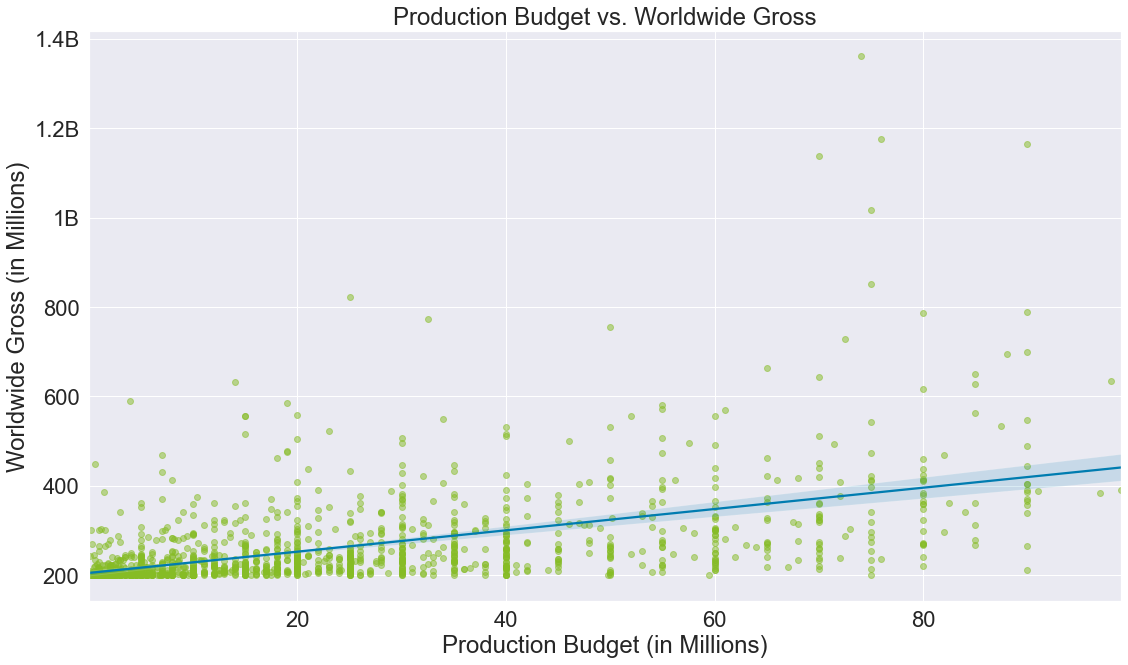

In [11]:
#Scatterplot of Production Budget vs. Worldwide Gross
sns.set_theme()
sns.set(font_scale=2)

color_palette = ["#86BC25", "#007CB0"] #Set Color of PLots to Deloitte Green
sns.set_palette(palette=color_palette)

fig, ax = plt.subplots()

#Let's Focus only budgets less than 100M since we do not want to make a budget 
#so large that it is unreasonable. Sample for 1500 to keep the graph clean
sampled = the_numbers[the_numbers['production_budget'] < 100000000]
sampled = sampled.sample(1500)

ax = sns.regplot(data=sampled, x='production_budget', y='worldwide_gross', 
            scatter_kws={'alpha':0.5}, line_kws={"color": "#007CB0"})
fig.set_size_inches(18.5, 10.5)

ax.set_xticklabels(['0', '20','40','60','80','100'])
ax.set_yticklabels(['0', '200','400','600','800','1B', '1.2B', '1.4B', '1.6B'])

ax.set_title("Production Budget vs. Worldwide Gross")
ax.set_xlabel("Production Budget (in Millions)")
ax.set_ylabel("Worldwide Gross (in Millions)")

We can see the positive correlation in the graph above. Next, we want to see if there are any notable frequencies for famous actors/personnel within the highest grossing movies. To do this, we want to look for the most extreme values. With our data being so large, we can assume it's normal (Central Limit Theorem), and can take the z score to see how far something is off the mean. 

In [12]:
def z_score(value, mean, std):
    return (value - mean) / std

In [13]:
the_numbers_mean = the_numbers['worldwide_gross'].mean()
the_numbers_med = the_numbers['worldwide_gross'].median()
the_numbers_std = the_numbers['worldwide_gross'].std()

print(the_numbers_mean)
print(the_numbers_med)

the_numbers['z_score'] = the_numbers['worldwide_gross'].apply(lambda x: z_score(x, the_numbers_mean, the_numbers_std))

91487460.90643376
27984448.5


Let's take a look at the movies that are over 3 times greater than the mean (aka Z-score greater than 3)

In [14]:
gross_outliers = the_numbers[the_numbers['z_score'] > 3]
outliers_movies_lst = list(gross_outliers['movie'].values)
outliers_movies_lst[:5]

['Avatar',
 'Pirates of the Caribbean: On Stranger Tides',
 'Avengers: Age of Ultron',
 'Star Wars Ep. VIII: The Last Jedi',
 'Star Wars Ep. VII: The Force Awakens']

Now combine that with our IMDB Database

In [15]:
imdb_people = pd.read_sql(f"""
SELECT pr.person_id, primary_name, death_year, category, primary_title,
       original_title
FROM persons p
LEFT JOIN principals pr ON pr.person_id = p.person_id
LEFT JOIN movie_basics mb ON pr.movie_id = mb.movie_id
""", conn)

We want to make sure that the personnel are alive, in the outlier movies list, and then group the frequency we see them.

In [16]:
#Make Sure Personnel is Alive
imdb_alive = imdb_people[imdb_people['death_year'].isnull() == True] 

#Check if Person is in List of Outliers
imdb_outliers = imdb_alive[imdb_alive['primary_title'].isin(outliers_movies_lst)]
display(imdb_outliers)

#Group Outliers Together to Get Counts
grouped = imdb_outliers.groupby(['category','primary_name']).size().reset_index(name='counts')
grouped.head()

,person_id,primary_name,death_year,category,primary_title,original_title
480,nm0125336,Jez Butterworth,NaN,writer,Spectre,Spectre
2286,nm0671567,Michael Peña,NaN,actor,Ant-Man and the Wasp,Ant-Man and the Wasp
2797,nm0834902,Robert Stromberg,NaN,director,Maleficent,Maleficent
2799,nm0837112,Richard Suckle,NaN,producer,Suicide Squad,Suicide Squad
3273,nm1014201,Rhett Reese,NaN,writer,Deadpool,Deadpool
...,...,...,...,...,...,...
1005549,nm9989238,Suneet Gautam,NaN,composer,Titanic,Titanic
1009487,nm9989231,Mahesh Vashisht,NaN,composer,Titanic,Titanic
1013926,nm9039216,Neil Boultby,NaN,actor,Coco,Coco
1029087,nm9061881,Natalia Kaverznikova,NaN,actress,Coco,Coco


,category,primary_name,counts
0,actor,Aarif Rahman,1
1,actor,Adil Hussain,1
2,actor,Alan Mathis,1
3,actor,Alan Tudyk,1
4,actor,Albert Brooks,1


Taking the same concept as before, let's take the creme de la creme, and get the most occurred actors.

In [17]:
grouped['counts'].mean() + (3 * grouped['counts'].std())

3.5381775991830686

In [18]:
grouped3 = grouped[grouped['counts'] > 4]

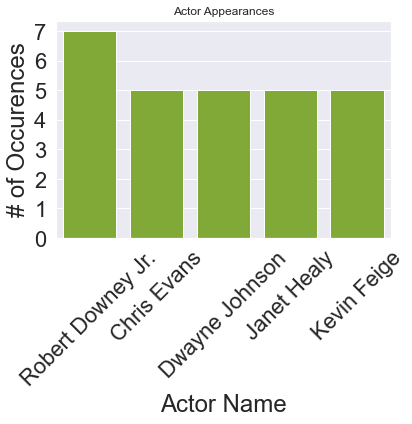

In [19]:
ax = sns.barplot(x="primary_name", y="counts", data=grouped3, color="#86BC25", order=grouped3.sort_values('counts', ascending=False).primary_name)
sns.set(rc={'figure.figsize':(15,10)})
ax.set_title("Actor Appearances")
ax.set_xlabel("Actor Name")
ax.set_ylabel("# of Occurences")
ax.set_xticklabels(ax.get_xticklabels(),rotation = 45)

plt.show()

I guess Ironman or Captain America could make any film better!

# Genre

We want to see if there was any difference in worldwide gross between genres to see what kind of genre would be best to produce.

In [20]:
#Create query 
q = '''
SELECT * 
FROM movie_basics
'''
#create a DF from the IMBD sql table
imdb_movie_ratings = pd.read_sql(q, conn)
#remove na's from the original title due to low numbers
imdb_movie_ratings.dropna(subset=['original_title'], inplace = True)
imdb_movie_ratings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146123 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146123 non-null  object 
 1   primary_title    146123 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146123 non-null  int64  
 4   runtime_minutes  114401 non-null  float64
 5   genres           140734 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 7.8+ MB


After we have the data from the query, we want to make sure that we can map the titles with The Numbers dataset.

In [21]:
#Making a copy just to make sure that we don't manipulate anything from before
tn_movie_budgets = the_numbers.copy()

#create a column for movie names to merge with other DFs   tn_movie_budgets
imdb_movie_ratings['title'] = (
    imdb_movie_ratings['original_title'].map(
        lambda x :''.join(filter(str.isalnum, x)).lower()))

#sets the index on the title field for the merge
tn_movie_budgets.set_index('title', inplace=True)
imdb_movie_ratings.set_index('title', inplace=True)
imdb_movie_ratings.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
title,,,,,,
sunghursh,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
ashadkaekdin,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
theothersideofthewind,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
sabsebadasukh,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
latelenovelaerrante,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


Now, let's join the two datasets together.

In [22]:
#combine imdb and the numbers tables
rating_and_budgets = tn_movie_budgets.join(imdb_movie_ratings, how = 'inner')
rating_and_budgets.reset_index(inplace=True)
rating_and_budgets = (
    rating_and_budgets.drop_duplicates(subset='title', keep="first"))
rating_and_budgets.head()

,title,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,days,months,year,z_score,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,10cloverfieldlane,54,2016-03-11,10 Cloverfield Lane,5000000,72082999,108286422,Friday,March,2016,0.096148,tt1179933,10 Cloverfield Lane,10 Cloverfield Lane,2016,103.0,"Drama,Horror,Mystery"
1,10daysinamadhouse,48,2015-11-11,10 Days in a Madhouse,12000000,14616,14616,Wednesday,November,2015,-0.523540,tt3453052,10 Days in a Madhouse,10 Days in a Madhouse,2015,111.0,Drama
2,127hours,6,2010-11-05,127 Hours,18000000,18335230,60217171,Friday,November,2010,-0.178974,tt1542344,127 Hours,127 Hours,2010,94.0,"Adventure,Biography,Drama"
3,12rounds,37,2009-03-27,12 Rounds,20000000,12234694,17306648,Friday,March,2009,-0.424570,tt3517850,12 Rounds,12 Rounds,2017,NaN,"Action,Drama,Romance"
4,12strong,64,2018-01-19,12 Strong,35000000,45819713,71118378,Friday,January,2018,-0.116581,tt1413492,12 Strong,12 Strong,2018,130.0,"Action,Drama,History"


We now want to split the genres into a list, not just have it be a string (as it we would need to catagorize the genres later).

In [23]:
rating_and_budgets['genres'] =  rating_and_budgets['genres'].str.split(',')
rating_and_budgets.head()

,title,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,days,months,year,z_score,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,10cloverfieldlane,54,2016-03-11,10 Cloverfield Lane,5000000,72082999,108286422,Friday,March,2016,0.096148,tt1179933,10 Cloverfield Lane,10 Cloverfield Lane,2016,103.0,"[Drama, Horror, Mystery]"
1,10daysinamadhouse,48,2015-11-11,10 Days in a Madhouse,12000000,14616,14616,Wednesday,November,2015,-0.523540,tt3453052,10 Days in a Madhouse,10 Days in a Madhouse,2015,111.0,[Drama]
2,127hours,6,2010-11-05,127 Hours,18000000,18335230,60217171,Friday,November,2010,-0.178974,tt1542344,127 Hours,127 Hours,2010,94.0,"[Adventure, Biography, Drama]"
3,12rounds,37,2009-03-27,12 Rounds,20000000,12234694,17306648,Friday,March,2009,-0.424570,tt3517850,12 Rounds,12 Rounds,2017,NaN,"[Action, Drama, Romance]"
4,12strong,64,2018-01-19,12 Strong,35000000,45819713,71118378,Friday,January,2018,-0.116581,tt1413492,12 Strong,12 Strong,2018,130.0,"[Action, Drama, History]"


We want to process the genres now into something more readable. The easiest way to do this would be to One-Hot Encode it so that we can retain all of the information we still have, but compare it to each other more easily. 

In [24]:
#create dummy collumns to get counts and easy splits
rating_and_budgets= (
    rating_and_budgets.drop('genres',1).join(
        rating_and_budgets.genres.str.join('|').str.get_dummies()))


Now, let's get a count of all the genres.

In [25]:
#Gets the counts or all of the genre categories
counts = rating_and_budgets.iloc[:,16:42].sum()
#Highest counts - Drama, comedy
print(counts)

Action          558
Adventure       428
Animation       131
Biography       189
Comedy          680
Crime           310
Documentary     196
Drama          1144
Family          139
Fantasy         156
History          69
Horror          285
Music            70
Musical          20
Mystery         169
News              1
Romance         276
Sci-Fi          176
Sport            48
Thriller        392
War              37
Western          20
dtype: int64


Let's run some basic stastics on the genres. 

In [26]:
#Lists for each individual statistics
#for genre in counts.index:
#    worldwide_gross_median.append(
#        rating_and_budgets[rating_and_budgets[genre] == 1]\
#            ['worldwide_gross'].median())

# Goes through each category and gets the statistic from it. 
# Then puts it in a dict with the counts

#Creates a new DF for processing
randb = rating_and_budgets.copy()
#median

worldwide_gross_median= [randb[randb[i] == 1]['worldwide_gross'].median() 
                         for i in counts.index]    
median_worldwide_gross = dict(zip(counts.index, worldwide_gross_median))

#mode
worldwide_gross_means = [randb[randb[i] == 1]['worldwide_gross'].mean() 
                         for i in counts.index]
mean_worldwide_gross = dict(zip(counts.index, worldwide_gross_means))

#count
worldwide_gross_counts = [randb[randb[i] == 1]['worldwide_gross'].count() 
                          for i in counts.index]
worldwide_gross_counts = dict(zip(counts.index, worldwide_gross_counts))

#max
worldwide_gross_max = [randb[randb[i] == 1]['worldwide_gross'].max() 
                       for i in counts.index]
worldwide_gross_max = dict(zip(counts.index, worldwide_gross_max))

#min
worldwide_gross_min = [randb[randb[i] == 1]['worldwide_gross'].min() 
                       for i in counts.index]
worldwide_gross_min = dict(zip(counts.index, worldwide_gross_min))

In [27]:
#sorts the values for data exploration
rating_and_budgets[rating_and_budgets['Music']==1].sort_values(
                                            'worldwide_gross',ascending=False)

,title,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,days,months,year,...,Music,Musical,Mystery,News,Romance,Sci-Fi,Sport,Thriller,War,Western
403,bohemianrhapsody,84,2018-11-02,Bohemian Rhapsody,55000000,216303339,894985342,Friday,November,2018,...,1,0,0,0,0,0,0,0,0,0
248,astarisborn,5,2018-10-05,A Star is Born,36000000,215288866,433449571,Friday,October,2018,...,1,0,0,0,1,0,0,0,0,0
1583,lalaland,92,2016-12-09,La La Land,20000000,151101803,426351163,Friday,December,2016,...,1,0,0,0,0,0,0,0,0,0
2101,pitchperfect2,14,2015-05-15,Pitch Perfect 2,29000000,184296230,287625468,Friday,May,2015,...,1,0,0,0,0,0,0,0,0,0
2102,pitchperfect3,58,2017-12-22,Pitch Perfect 3,45000000,104897530,185736412,Friday,December,2017,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,alongtheroadside,91,2015-03-24,Along the Roadside,250000,0,3234,Tuesday,March,2015,...,1,0,0,0,1,0,0,0,0,0
162,americanhero,3,2015-12-11,American Hero,1000000,0,26,Friday,December,2015,...,1,0,0,0,0,0,0,0,0,0
3220,theresaisamother,40,2015-09-29,Theresa Is a Mother,200000,0,0,Tuesday,September,2015,...,1,0,0,0,0,0,0,0,0,0
2548,steelspirit,58,2003-12-01,Steel Spirit,20000,0,0,Monday,December,2003,...,1,0,0,0,0,0,0,0,0,0


For easier access, let's create a dataframe of all the statistics.

In [28]:
#creates dataframe to highlight the stats
movie_stats = pd.DataFrame(
    zip(median_worldwide_gross.values(), 
        mean_worldwide_gross.values(), 
        worldwide_gross_counts.values(), 
        worldwide_gross_max.values(),
        worldwide_gross_min.values()),
    median_worldwide_gross.keys(),
        ['Medians','Means','Counts','Max','Min'])

In [29]:
#sorts the DF by median
movie_stats.sort_values('Medians', ascending=False)

,Medians,Means,Counts,Max,Min
Animation,197578586.0,3.006570e+08,131,1242520711,0
Adventure,182667975.0,3.034551e+08,428,2208208395,0
Action,87359119.5,1.993443e+08,558,2048134200,0
Fantasy,84720721.5,2.078764e+08,156,1259199706,0
Sci-Fi,79476525.5,2.553969e+08,176,2048134200,0
News,57293371.0,5.729337e+07,1,57293371,57293371
Comedy,46055025.0,1.122968e+08,680,1160336173,0
Family,42174545.0,1.401701e+08,139,1259199706,0
Mystery,34246770.0,7.642743e+07,169,586464305,0
Musical,30128794.5,1.309215e+08,20,1259199706,0


Let's explore the distribution of the genres. 

<AxesSubplot:xlabel='worldwide_gross', ylabel='Density'>

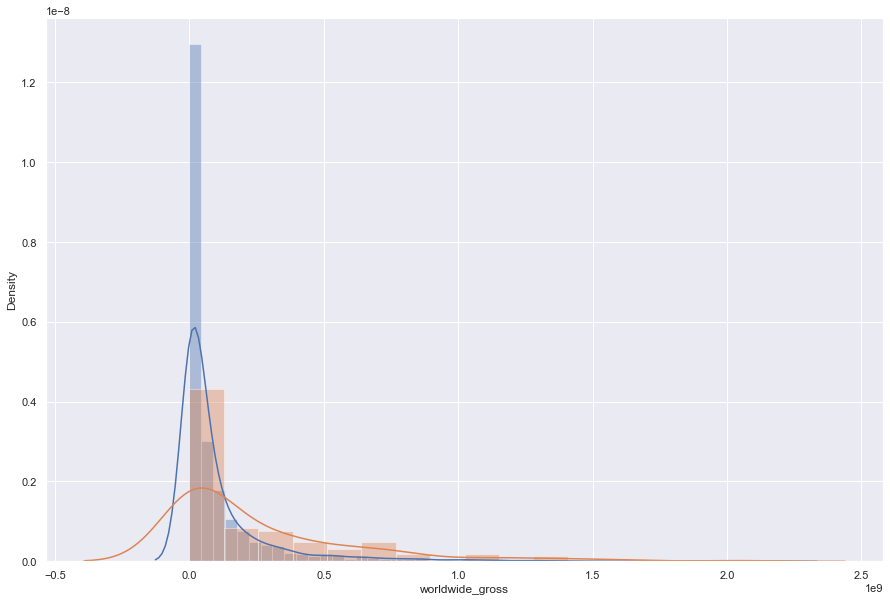

In [30]:
#plot the distribution of overall and the category
sns.distplot(rating_and_budgets['worldwide_gross'])
sns.distplot(
    rating_and_budgets[rating_and_budgets['Sci-Fi']==1]['worldwide_gross'])

We can see a right skew of the data from the graph above.

# Statistical Test for Animation

We are using a hypothesis test to determine if there was a significant difference between the worldwide gross of animated movies compared to the rest of the sample of movies. We used a 1 sample t-test instead of a graph so that we could see if the difference was statistically significant. 

Null Hypothesis: Animation Movies produce the same Worldwide Gross as other genres of movies.

Alternative Hypothesis: Animation Movies produce a higher Worldwide Gross than other genres of movies.

Alpha: 0.05


In [31]:
#Creates two DFs, one with Sci-Fi and one without
animated_movies = rating_and_budgets[rating_and_budgets['Animation'] == 1]
not_animated_movies = rating_and_budgets[rating_and_budgets['Animation'] == 0]

In [32]:
#Runs a ttest
stats.ttest_ind(animated_movies['worldwide_gross'], 
                not_animated_movies['worldwide_gross'])

Ttest_indResult(statistic=11.819691277138588, pvalue=2.2692702400680073e-31)

With a p-value that is approaching 0, we can reject the null hypothesis and say that there is a significant difference between Animated movies gross compared to other genres' worldwide gross.

We do want to address the limitations of this test. The largest issue that comes here is due to the skewness of the data. This is likely due to the data collection hear, as the database with the production value and worldwide gross only has around 4k movies, compared to the 150k+ movies on the IMDB database. These movies also appear to be larger movies that have a much higher production value.

Just out of curiousity, we ran this test on the other genres as well.

In [33]:
#Does the above tests for every genre
ttest_res = []
for genre in counts.index:
    genre_movie = rating_and_budgets[rating_and_budgets[genre] == 1]
    not_genre_movies = rating_and_budgets[rating_and_budgets[genre] == 0]
    ttest_res.append(stats.ttest_ind(genre_movie['worldwide_gross'], 
                                     not_genre_movies['worldwide_gross']))
#Warning happens due to th T-test being ran on news, which has 2 samples

In [34]:
#Creates a DF for all the t-statistics and pvals
tscores = pd.DataFrame(dict(zip(counts.index, ttest_res)), 
                       ["Statistic", "Pvalue"]).T

In [35]:
#sorts the df by statistic
tscores.sort_values('Statistic')

,Statistic,Pvalue
Drama,-10.456188,4.725722e-25
Horror,-4.632482,3.807083e-06
Documentary,-4.269255,2.037877e-05
Romance,-4.233917,2.383419e-05
Crime,-4.057785,5.113105e-05
Biography,-2.796640,5.205042e-03
Thriller,-2.656510,7.947929e-03
History,-2.165104,3.047846e-02
Mystery,-1.962300,4.984347e-02
Music,-1.802306,7.162329e-02


Let's now plot to see how the worldwide gross compares for each genre.

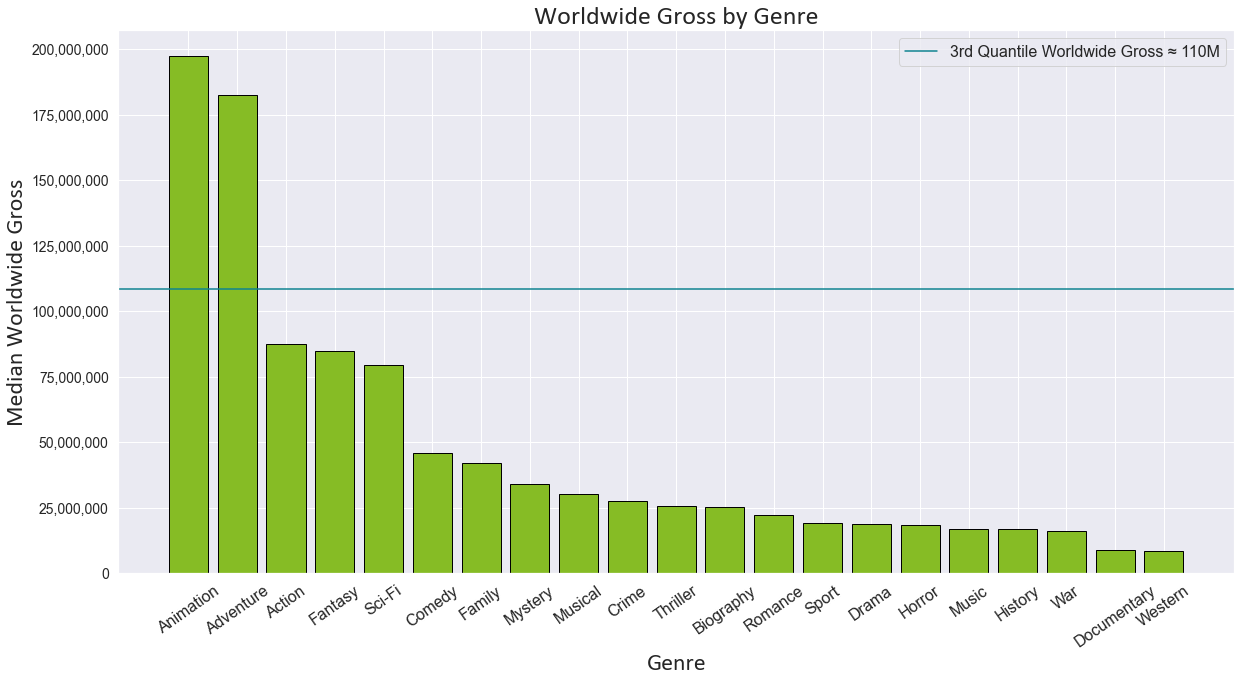

In [36]:
#Sets the theme to seaborn
sns.set_theme()

#Set a default font
font = {'fontname':'Calibri'}

#Remove News as there is only 1 sample
cleaned_stats = movie_stats.drop(
    index='News').sort_values('Medians', ascending=False)

#Create figure
fig, ax = plt.subplots(figsize=(20,10))

#Create a bar plot for all of the medians for each genre
ax.bar(range(0,len(cleaned_stats['Medians'])), 
       list(cleaned_stats['Medians']), 
       color = '#86BC25',
       edgecolor = "black")

#Creates the xticks
ax.set_xticks(range(0,len(cleaned_stats['Medians'])))
ax.set_xticklabels(list(cleaned_stats.index.values),
                   rotation = 35,
                   fontsize = 16)

#Sets the tables and the titles
ax.set_xlabel('Genre', fontsize = 24,**font)
ax.set_ylabel('Median Worldwide Gross', fontsize=24,**font)
ax.set_title('Worldwide Gross by Genre', fontsize=26,**font)

#Cleans up the formatting of ticks
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.yticks(fontsize=14)

#plot 3rd Quantile gross line line
plt.axhline(y = rating_and_budgets['worldwide_gross'].quantile(.75), 
            color = '#0D8390', linestyle = '-', 
            label = '3rd Quantile Worldwide Gross ≈ 110M')

#Shows the legend
ax.legend(prop={'size': 16})
#Set the legend font
matplotlib.rc('font',family='Times New Roman')

plt.show()

And see the difference in Animated Movies compared to non-animated movies.

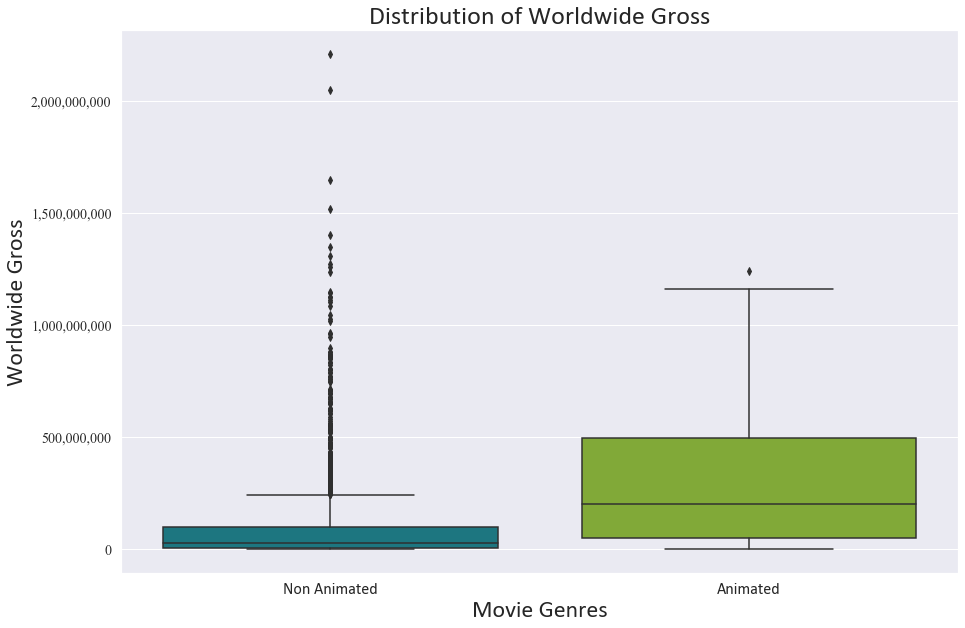

In [37]:
#Create a boxplot of 
medianbox = sns.boxplot(data=rating_and_budgets,
                        x = 'Animation',
                        y = 'worldwide_gross',
                        palette = ['#0D8390','#86BC25'])
#Set the title and fonts
medianbox.set_title('Distribution of Worldwide Gross', fontsize=26,**font)
#Sets the labels and fonts
medianbox.set_xlabel('Movie Genres', fontsize=24,**font)
medianbox.set_ylabel('Worldwide Gross', fontsize=24,**font)

#Adjusts the labels for the boxes
medianbox.set_xticklabels(['Non Animated','Animated'], fontsize=16,**font)

#Formatts the y ticks
medianbox.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.yticks(fontsize=14)

plt.show()

Let's take this a step further and see the spread of the data per genre.

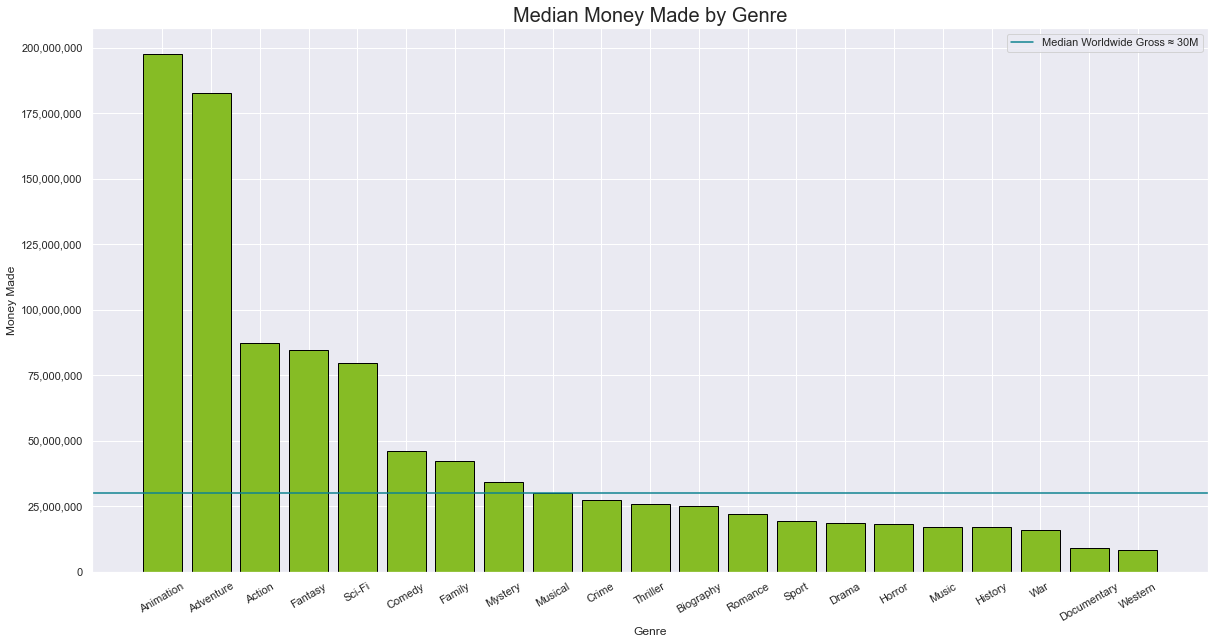

In [38]:
#Sets the theme to seaborn
sns.set_theme()

#Remove News as there is only 1 sample
cleaned_stats = movie_stats.drop(
    index='News').sort_values('Medians', ascending=False)

#Create figure
fig, ax = plt.subplots(figsize=(20,10))

#Create a bar plot for all of the medians for each genre
ax.bar(range(0,len(cleaned_stats['Medians'])), 
       list(cleaned_stats['Medians']), color = '#86BC25',edgecolor = "black")

#Creates the xticks
ax.set_xticks(range(0,len(cleaned_stats['Medians'])))
ax.set_xticklabels(list(cleaned_stats.index.values), rotation = 30)

#Sets the tables and the titles
ax.set_xlabel('Genre')
ax.set_ylabel('Money Made')
ax.set_title('Median Money Made by Genre', fontsize=20)
#Cleans up the formatting of
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

#plot median income line
plt.axhline(y = rating_and_budgets['worldwide_gross'].median(), 
            color = '#0D8390', linestyle = '-', 
            label = 'Median Worldwide Gross ≈ 30M')
#Shows the legend
ax.legend()

plt.show()

# Release Date

Let's explore how the movies performed in each month.

After extracting and creating a new column called "months" during our data cleaning process, we wanted to create a numeric column for months to sort the data and display the months in ascending order.

To take a closer look at the recent trends, we filtered our dataset with movies released after 2000.

In [39]:
#Create a dictionary 
months_dict = { 'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 
               'June': 6, 'July': 7, 'August': 8, 'September': 9, 
               'October': 10, 'November': 11, 'December': 12}

#Map the dictionary to the 'month' column 
rating_and_budgets['months_numeric'] = rating_and_budgets['months'].apply(lambda x: months_dict.get(x))

#Sort the numeric months column in the ascending order
rating_and_budgets = rating_and_budgets.sort_values('months_numeric')

#Filtering the dataset with movies released from the year 2000
rating_and_budgets = rating_and_budgets[rating_and_budgets['year'] >= 2000]

Let's see the average gross earnings made from all the movies post 2000 by month.

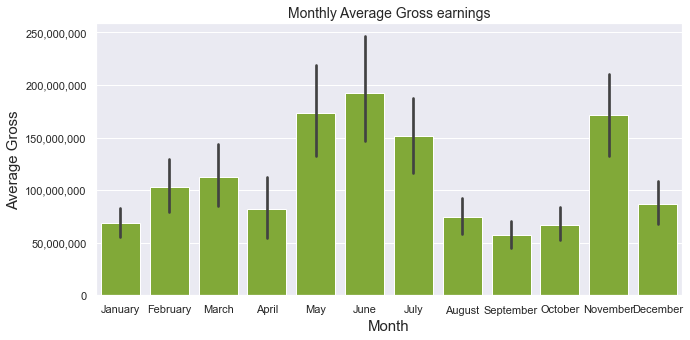

In [40]:
fig, ax = plt.subplots()
ax = sns.barplot(data = rating_and_budgets, x='months', y='worldwide_gross', 
                 color ='#86BC25')
fig.set_size_inches(10.5, 5)
ax.set_title('Monthly Average Gross earnings', fontsize=14)
ax.set_xlabel('Month', fontsize=15)
ax.set_ylabel('Average Gross', fontsize=15)
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

From the graph above, we can see that the average gross earnings is significantly higher during the holiday seasons.

In [41]:
#Creating a seperate dataframe called df_plot for visualisations. 

df_plot = tn_movie_budgets.join(imdb_movie_ratings, how = 'inner')
df_plot.reset_index(inplace=True)
df_plot = (df_plot.drop_duplicates(subset='title', keep="first"))
# Convert values into string and split them
df_plot['genres'] = df_plot['genres'].str.split(",")
# Convert values into list of strings
df_plot['genres'] = df_plot['genres'].tolist()
# Explode list into individual values
df_plot = df_plot.explode('genres')


months_dict = {'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5,
               'June': 6, 'July': 7, 'August': 8, 'September': 9, 
               'October': 10, 'November': 11, 'December': 12}
df_plot['months_numeric'] = df_plot['months'].apply(lambda x: months_dict.get(x))
df_plot = df_plot.sort_values('months_numeric')
df_plot = df_plot[df_plot['year'] >= 2000]

As we progressed with our analysis, we thought it would be interesting to see how "Animation" and "Adventure" performed and when would be the best release time for these 2 genres.

In [42]:
# Plotting world gross by month for top 2 genres : Animation and Adventure
def plots(df, genre, colors,n1,n2):
    animated_df=df[df['genres']==genre]
    animated_df = animated_df.drop_duplicates('title')
    animated_df = animated_df.groupby(['months_numeric']).worldwide_gross.mean()
    # Create a figure and axis
    fig, ax = plt.subplots(figsize=(12,6))
    # Get x and y data
    x1 = animated_df.index
    y1 = animated_df.values
    graph = ax.bar(x1, y1, color ='#86BC25')
    graph[n1].set_color(colors)
    graph[n2].set_color(colors)
    months =['Jan','Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul','Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    months_num = range(1,13)
    ax.set_xticks(months_num)
    ax.set_xticklabels(months)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    ax.set_title('Monthly Average Gross earnings for ' + genre + ' movies', fontsize=14)
    ax.set_xlabel('Month', fontsize=15)
    ax.set_ylabel('Average Gross', fontsize=15)
    ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
    plt.tight_layout()
    plt.savefig('plot3.jpg')

Plot's for Animation and Adventure

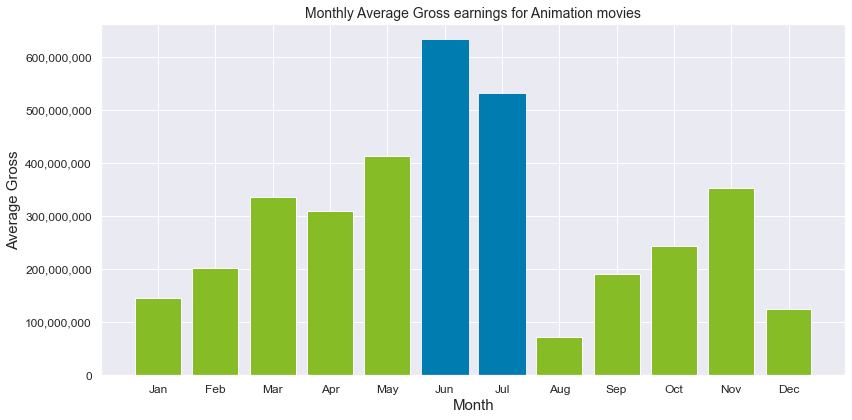

In [43]:
# Visualisation of average gross earnings for Animated movies
plots(df_plot, 'Animation','#007CB0',5,6)

Animated movies released in the month of June yielded highest average gross earnings. We noticed that movies release in the early summer returned higher gross compared to other months (this could be because of the schools and colleges being off and people tending to have more leisure time).

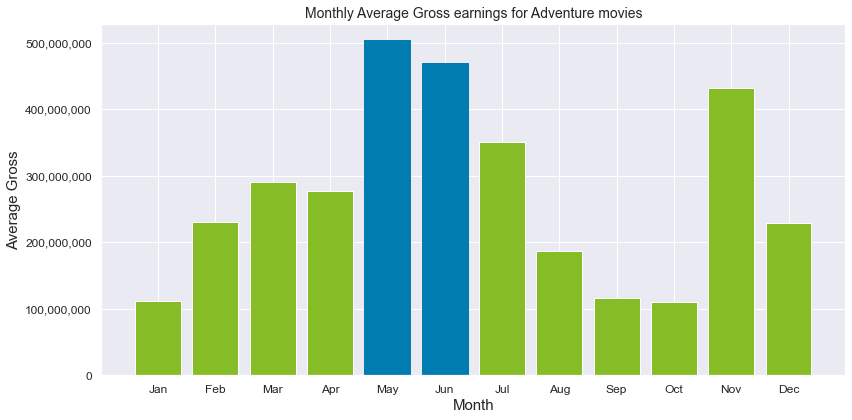

In [44]:
# Visualisation of average gross earnings for Adventure movies
plots(df_plot, 'Adventure', '#007CB0',4,5)

We can see that May has returned highest average gross earnings for Adventure movies, but having a very similar pattern to the Animated movies release time.